### AMS 580 - Team Project 1 - Python - Logistic Regression

#### Eshan Shakrani, Vishnu Teja Sardee, Priyansh Desai, Mustafa Isik

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# read in the data set and store in a Pandas DataFrame
data = pd.read_csv('pimaindiansdiabetes2.csv')

# show first 10 observations in the data 
data.head(10)

,Unnamed: 0,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
5,6,5,116.0,74.0,NaN,NaN,25.6,0.201,30,neg
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,pos
7,8,10,115.0,NaN,NaN,NaN,35.3,0.134,29,neg
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,pos
9,10,8,125.0,96.0,NaN,NaN,NaN,0.232,54,pos


In [3]:
# remove "Unnamed: 0" column
# this column is sometimes generated when reading in data
if ("Unnamed: 0" in data.columns):
    data = data.drop("Unnamed: 0", axis = 1)

# dimensions of the data
print("Rows, Columns:", data.shape)

data.head(10)

Rows, Columns: (768, 9)


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,neg
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,pos
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,neg
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,pos
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,pos


In [4]:
# we can see how many missing values there are in each column 
data.isna().sum()

pregnant      0
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64

In [5]:
# get rid of any observations containing missing values
data = data.dropna()

data.isna().sum()

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [6]:
print("New dimensions:")
print("Rows, Columns:", data.shape)

New dimensions:
Rows, Columns: (392, 9)


In [7]:
# out of 768 observations, only 392 are left

In [8]:
# predictors
X = data.drop('diabetes', axis = 1)

# response
y = data['diabetes']

In [9]:
# split the data into 80% training and 20% testing using seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [10]:
# fit the Logistic Regression model to the data
model = LogisticRegression(random_state=123)

model.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [11]:
# use the fitted model to predict the class for test data
y_pred = model.predict(X_test)

In [12]:
# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
cm

array([[48,  6],
       [17,  8]], dtype=int64)

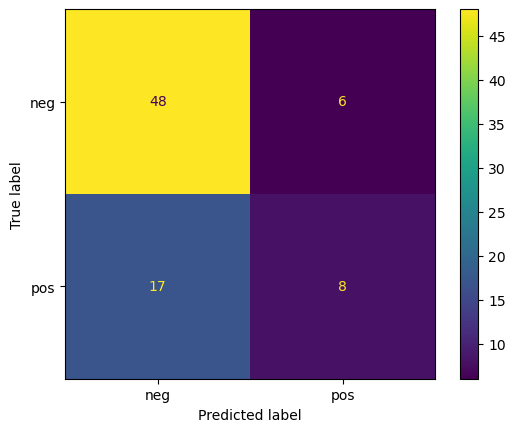

In [13]:
# better visualization of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [14]:
# accuracy - one method
accuracy = model.score(X_test, y_test)
print(f"The accuracy of the Logistic Regression model is {accuracy:.5}")

The accuracy of the Logistic Regression model is 0.70886


In [15]:
# accuracy - another method
accuracy2 = accuracy_score(y_test, y_pred)
print(f"The accuracy of the Logistic Regression model is {accuracy2:.5}")

The accuracy of the Logistic Regression model is 0.70886


In [16]:
# can extract the elements of the confusion matrix multiple ways
# true negative, false positive, false negative, true positive
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(48, 6, 17, 8)

In [17]:
# another way
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn, fp, fn, tp

(48, 6, 17, 8)

In [18]:
# sensitivity
sensitivity = tp / (tp + fn)
print(f'The probability that a diabetic subject is predicted to be diabetic is {sensitivity:.3}')

The probability that a diabetic subject is predicted to be diabetic is 0.32


In [19]:
# specificity
specificity = tn / (tn + fp)
print(f'The probability that a non-diabetic subject is predicted to be non-diabetic is {specificity:.3}')

The probability that a non-diabetic subject is predicted to be non-diabetic is 0.889
